In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('jedinstveni.csv')
#Strana volana je uvek leva
df = df.drop('Strana volana', axis=1)
#Stanje je na svim automobilima uneseno kao polovno vozilo
df = df.drop('Stanje', axis=1)

In [354]:
#Koliko imamo nedostajucih vrednosti po svakoj koloni
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                  10
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Boja enterijera          644
Materijal enterijera     519
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Broj sedišta               0
Safety_Features          140
Equipment_Features       133
dtype: int64

<Axes: >

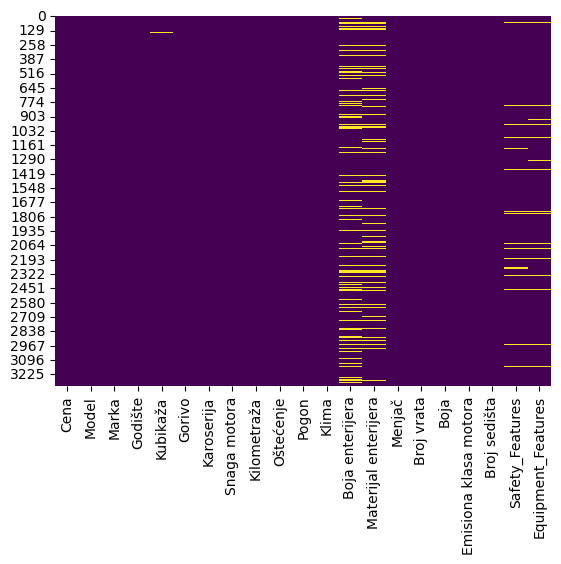

In [355]:
#vizualizacija nedostajucih vrednosti po kolonama
import seaborn as seab
seab.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [356]:
missing_rows = df[df['Kubikaža'].isnull()]
print(missing_rows)


          Cena    Model       Marka  Godište Kubikaža            Gorivo  \
146   22.900 €  Model S       Tesla   2013.0      NaN  Električni pogon   
556    7.400 €   ForTwo       Smart   2015.0      NaN  Električni pogon   
1787  22.900 €  Model S       Tesla   2013.0      NaN  Električni pogon   
2577  11.999 €  ForFour       Smart   2017.0      NaN  Električni pogon   
2649  19.100 €     Kona     Hyundai   2018.0      NaN  Električni pogon   
2775   9.900 €   ForTwo       Smart   2017.0      NaN  Električni pogon   
2962   7.990 €      iOn     Peugeot   2016.0      NaN  Električni pogon   
2979  15.000 €     Leaf      Nissan   2018.0      NaN  Električni pogon   
3075  20.000 €   Golf 7  Volkswagen   2018.0      NaN  Električni pogon   
3093   6.700 €   C-Zero     Citroen   2017.0      NaN  Električni pogon   

     Karoserija     Snaga motora Kilometraža     Oštećenje  ...  \
146    Limuzina  310/421 (kW/KS)  163.421 km  Nije oštećen  ...   
556      Hečbek    17/23 (kW/KS)   37.00

In [357]:
print(missing_rows['Kubikaža'], missing_rows['Gorivo'])

146     NaN
556     NaN
1787    NaN
2577    NaN
2649    NaN
2775    NaN
2962    NaN
2979    NaN
3075    NaN
3093    NaN
Name: Kubikaža, dtype: object 146     Električni pogon
556     Električni pogon
1787    Električni pogon
2577    Električni pogon
2649    Električni pogon
2775    Električni pogon
2962    Električni pogon
2979    Električni pogon
3075    Električni pogon
3093    Električni pogon
Name: Gorivo, dtype: object


In [358]:
df['Gorivo'].value_counts()

Gorivo
Dizel                      2300
Benzin                      820
Benzin + Gas (TNG)          131
Benzin + Metan (CNG)         36
Hibridni pogon               18
Električni pogon             10
Hibridni pogon (Benzin)       6
Hibridni pogon (Dizel)        6
Plug-in hibrid                1
Name: count, dtype: int64

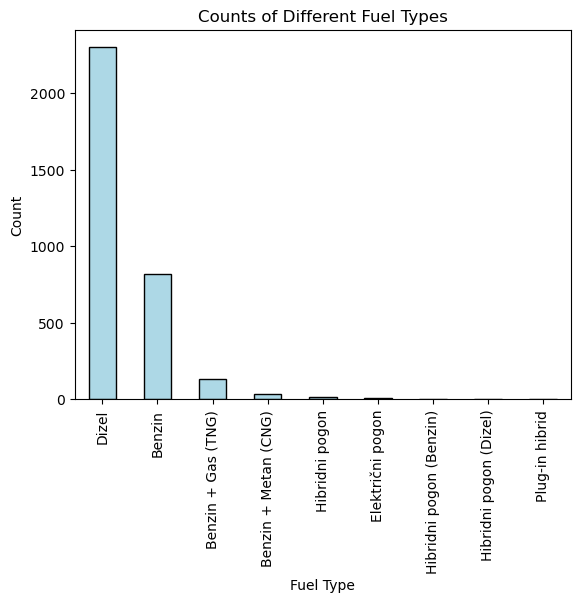

In [359]:
df['Gorivo'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [360]:
#Zakljucujemo da ne zelimo da radimo sa elektricnim i hibridnim vozililma jer ih ima ukupno 41 (premalo)
#Benzin u kombiniciji sa TNG i CNG cemo spojiti u jednu kategoriju
def categorize_fuel(value):
    if value == 'Dizel':
        return 'Dizel'
    elif value == 'Benzin':
        return 'Benzin'
    elif value in ['Benzin + Gas (TNG)', 'Benzin + Metan (CNG)']:
        return 'Gas'
    else:
        return 'Other'

df['Gorivo'] = df['Gorivo'].apply(categorize_fuel)

df = df[df['Gorivo'] != 'Other']

Gorivo
Dizel     2300
Benzin     820
Gas        167
Name: count, dtype: int64


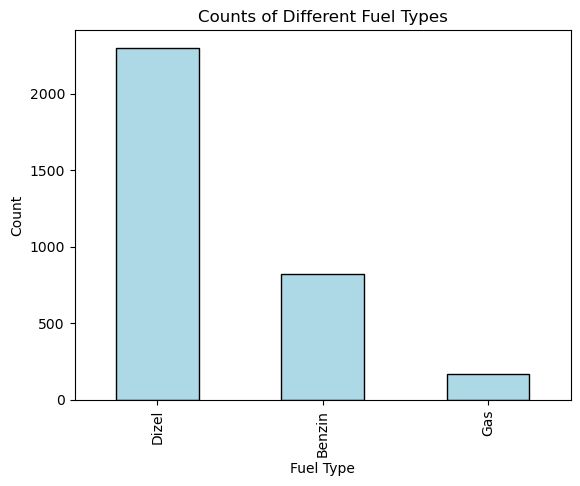

In [361]:
#Prema tipu goriva skup nije balansiran
print(df['Gorivo'].value_counts())
df['Gorivo'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [362]:
#Koliko imamo nedostajucih vrednosti po svakoj koloni
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                   0
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Boja enterijera          638
Materijal enterijera     517
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Broj sedišta               0
Safety_Features          138
Equipment_Features       132
dtype: int64

In [363]:
valid_safety_features = ["Airbag", "Child lock", "ABS", "Blokada motora", "Ulazak bez ključa"]
def count_valid_safety_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_safety_features))
    return 'missing'
df['Safety_Feature_Count'] = df['Safety_Features'].apply(count_valid_safety_features)
valid_equipment_features = ["Sportska sedišta", "Tempomat", "Senzori za kišu", "Parking senzori", "Aluminijumske felne", "Multimedija"]
def count_valid_equipment_features(features):
    if pd.notnull(features):  # Check if not NaN
        return sum(1 for feature in features.split(';') if any(valid in feature for valid in valid_equipment_features))
    return 'missing'
df['Equipment_Feature_Count'] = df['Equipment_Features'].apply(count_valid_equipment_features)

df = df.drop('Safety_Features', axis=1)
df = df.drop('Equipment_Features', axis=1)

print(df[['Safety_Feature_Count', 'Equipment_Feature_Count']])

     Safety_Feature_Count Equipment_Feature_Count
0                       4                       2
1                       4                       4
2                       4                       1
3                       4                       3
4                       4                       1
...                   ...                     ...
3323                    3                       5
3324                    4                       5
3325                    3                       5
3326              missing                 missing
3327                    5                       5

[3287 rows x 2 columns]


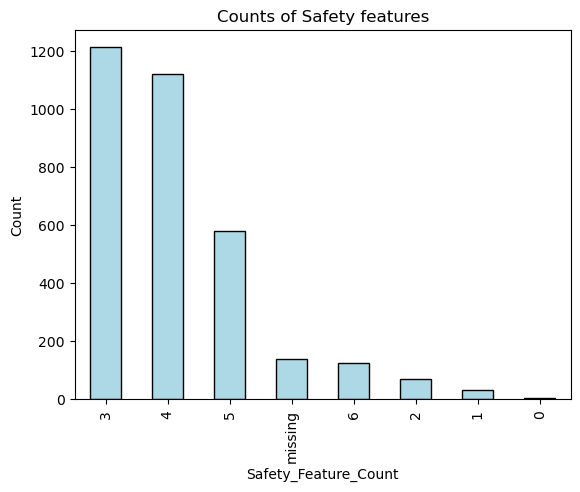

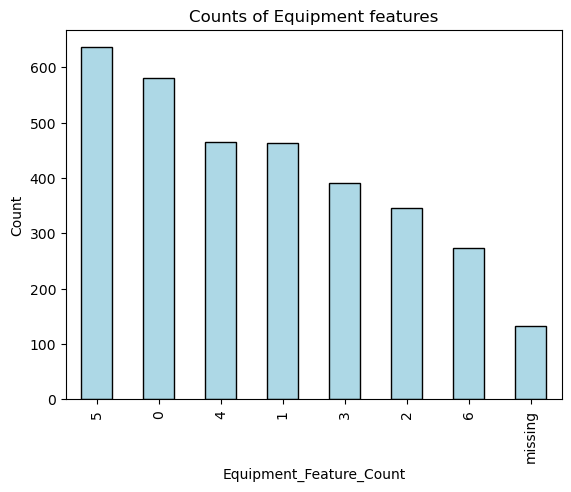

In [364]:
#Nedostajuce vrednosti cemo interpolirati zato sto se radi o nebalansiranom skupu slicnom normalnoj raspodeli
df['Safety_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features')
plt.ylabel('Count')
plt.show()

#Ovde je situacija relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features')
plt.ylabel('Count')
plt.show()

In [365]:
# Replace 'missing' with NaN for easier handling, when errors='coerce' is set, non-numeric values are converted to NaN instead of raising an error
df['Safety_Feature_Count'] = pd.to_numeric(df['Safety_Feature_Count'], errors='coerce')

# Interpolate missing values using polynomial interpolation (default degree is 2, you can change it)
df['Safety_Feature_Count'] = df['Safety_Feature_Count'].interpolate(method='polynomial', order=2).round().clip(upper=6)

print(df['Safety_Feature_Count'].value_counts())


Safety_Feature_Count
3.0    1253
4.0    1173
5.0     602
6.0     133
2.0      87
1.0      35
0.0       4
Name: count, dtype: int64


In [366]:
# Replace 'missing' with NaN for easier handling, when errors='coerce' is set, non-numeric values are converted to NaN instead of raising an error
df['Equipment_Feature_Count'] = pd.to_numeric(df['Equipment_Feature_Count'], errors='coerce')

# Calculate the median of 'Equipment_Feature_Count' excluding 'NaN' values
median_value = df['Equipment_Feature_Count'].median()

# Replace 'NaN' (which represents 'missing') with the calculated median
df['Equipment_Feature_Count'] = df['Equipment_Feature_Count'].fillna(median_value)

print(df['Equipment_Feature_Count'].value_counts())

Equipment_Feature_Count
5.0    636
0.0    580
3.0    523
4.0    465
1.0    464
2.0    346
6.0    273
Name: count, dtype: int64


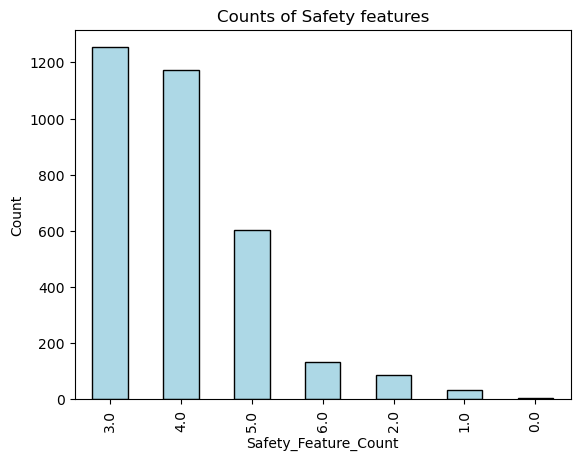

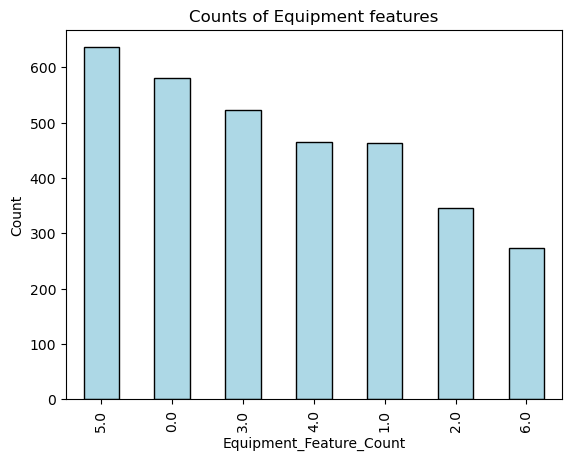

In [368]:
df['Safety_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Safety features')
plt.ylabel('Count')
plt.show()

#Ovde je situacija relativno balansirana pa je dovoljno iskoristiti medijanu za popunjavanje nedostajucih vrednosti
df['Equipment_Feature_Count'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Counts of Equipment features')
plt.ylabel('Count')
plt.show()

In [367]:
#Posto nedostajucih vrednosti ima oko 500,600 mozemo iskoristiti dodavanje nove kategorije 'nepoznato' za njih
df['Materijal enterijera'] = df['Materijal enterijera'].fillna('Nepoznato')
print(df['Materijal enterijera'].value_counts())
df['Boja enterijera'] = df['Boja enterijera'].fillna('Nepoznato')
print(df['Boja enterijera'].value_counts())

Materijal enterijera
Štof                1767
Nepoznato            517
Prirodna koža        512
Kombinovana koža     404
Drugi                 49
Velur                 38
Name: count, dtype: int64
Boja enterijera
Crna         1665
Nepoznato     638
Siva          627
Bež           152
Druga         139
Smeđa          66
Name: count, dtype: int64


In [369]:
#Sada nemamo vise nedostajucih vrednosti
df.isnull().sum()

Cena                       0
Model                      0
Marka                      0
Godište                    0
Kubikaža                   0
Gorivo                     0
Karoserija                 0
Snaga motora               0
Kilometraža                0
Oštećenje                  0
Pogon                      0
Klima                      0
Boja enterijera            0
Materijal enterijera       0
Menjač                     0
Broj vrata                 0
Boja                       0
Emisiona klasa motora      0
Broj sedišta               0
Safety_Feature_Count       0
Equipment_Feature_Count    0
dtype: int64

In [132]:
df['Cena'][1]

'9.500 €'

In [133]:
numeric_value = float(df['Cena'][1].replace('€', '').replace('.', '').strip())

In [134]:
print(numeric_value)

9500.0


In [135]:
def clean_currency(value):
    return float(value.replace('€', '').replace('.', '').strip())

In [136]:
def clean_mileage(vcalue):
    return float(value.replace('km', '').replace('.', '').strip())

In [137]:
def clean_engine_volume(value):
    if "cm3" in value:
        return float(value.replace('cm3', '').replace('.', '').strip())
    return value 

In [138]:
def extract_kw(value):
    return float(value.split('/')[0].strip())

In [139]:
df['Cena'] = df['Cena'].apply(clean_currency)
df['Kilometraža'] = df['Kilometraža'].apply(clean_mileage)
# df['Kubikaža'] = df['Kubikaža'].apply(clean_engine_volume)
df['Snaga motora'] = df['Snaga motora'].apply(extract_kw)

print(df)

         Cena              Model          Marka  Godište  Kubikaža  \
0      3200.0            Astra H           Opel   2006.0  1686 cm3   
1      9500.0                 A3           Audi   2013.0  1598 cm3   
2      4000.0            Octavia          Škoda   2008.0  1896 cm3   
3      3300.0              A 180  Mercedes Benz   2008.0  1991 cm3   
4      3550.0            Corsa D           Opel   2009.0  1229 cm3   
...       ...                ...            ...      ...       ...   
3323  34990.0                730            BMW   2016.0  2993 cm3   
3324  17500.0                 A4           Audi   2016.0  1968 cm3   
3325  10500.0             Golf 7     Volkswagen   2017.0  1598 cm3   
3326  13500.0             Superb          Škoda   2017.0  2000 cm3   
3327  29200.0  Range Rover Velar     Land Rover   2017.0  1999 cm3   

                  Gorivo Karoserija  Snaga motora         Stanje:  \
0                  Dizel     Hečbek          74.0  Polovno vozilo   
1                  Di

In [140]:
df['Kubikaža'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3328 entries, 0 to 3327
Series name: Kubikaža
Non-Null Count  Dtype 
--------------  ----- 
3318 non-null   object
dtypes: object(1)
memory usage: 26.1+ KB


In [141]:
def find_missing_values(df, column_name):
    # Check for missing values in the column
    missing_indices = df[df[column_name].isna() | (df[column_name].str.strip() == '')].index.tolist()
    return missing_indices

In [142]:
missing_values = find_missing_values(df, 'Kubikaža')
print("Missing values found at indices:", missing_values)

Missing values found at indices: [146, 556, 1787, 2577, 2649, 2775, 2962, 2979, 3075, 3093]


In [143]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Cena : [3.2000e+03 9.5000e+03 4.0000e+03 3.3000e+03 3.5500e+03 6.0000e+03
 7.3000e+03 2.0900e+03 1.4000e+04 1.1600e+04 7.9900e+03 7.9990e+03
 3.7500e+03 2.4900e+03 8.5000e+03 4.3500e+03 5.5000e+03 3.4000e+03
 5.8500e+03 1.6900e+04 1.0600e+04 2.9000e+03 9.8000e+03 1.3500e+04
 3.7000e+03 3.0000e+03 9.9990e+03 4.7990e+03 3.5000e+03 1.8500e+04
 2.9999e+04 5.2000e+03 5.4900e+03 1.5000e+04 1.6700e+04 2.6500e+03
 6.6500e+03 7.4990e+03 5.7900e+03 1.2800e+04 2.1500e+03 1.2500e+04
 7.6500e+03 1.4500e+04 1.7000e+03 1.1950e+04 9.6000e+03 3.6000e+03
 1.3000e+04 1.6200e+04 7.8900e+03 1.6350e+04 1.0000e+04 2.9990e+03
 4.9000e+03 8.9000e+03 1.1800e+04 1.1400e+04 4.9900e+03 3.9000e+03
 2.9900e+03 2.3900e+03 2.8000e+03 8.8500e+03 1.5900e+04 9.4990e+03
 1.3499e+04 6.7000e+03 9.1900e+03 4.2990e+03 5.5990e+03 5.9900e+03
 7.0000e+03 1.7990e+04 3.6990e+03 9.9000e+03 3.1000e+03 2.0000e+03
 9.4000e+03 3.2500e+03 1.0800e+04 2.5000e+04 2.1500e+04 7.7000e+03
 1.5100e+04 2.6000e+03 4.7000e+03 5.3000e+03 4.4000e+03